In [332]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [255]:
#Reading the data as Dataframe
data=pd.read_csv('insurance.csv')
insurance=pd.DataFrame(data)

In [256]:
#Shape of the data
insurance.info()

# 1338 rows and 7 Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [257]:
#Finding datatype of each attributes
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [258]:
insurance.info()

# No Null values in any attirbutes as there are 1338 non-null rows for all and total size in 1338x7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [259]:
# 5 point summary of the data
insurance.describe(percentiles=[.10,.25,.50,.75,.99])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
10%,19.000000,22.990000,0.000000,2346.533615
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
99%,64.000000,46.407900,5.000000,48537.480726
max,64.000000,53.130000,5.000000,63770.428010



"""
5 point Summary of Age, BMI and Charges


Age: Standard Deviation= 14.049
     Minimum value= 18
     Maximum Value= 64
     25th Percentile= 27
     75th Percentile= 51
     
BMI: 
     Standard Deviation= 6.098
     Minimum value= 15.96
     Maximum Value= 53.13
     25th Percentile=26.29
     75th Percentile= 34.69
     
Charges:
     Standard Deviation= 1211.011
     Minimum value= 1121.873
     Maximum Value= 63770.43
     25th Percentile= 4740.287
     75th Percentile= 16639.912
     
Childred:
     Standard Deviation= 1.205
     Minimum value= 0
     Maximum Value= 5
     25th Percentile=0
     75th Percentile= 2   
     """

Mean : 39.20702541106129
Median : 39.0
Mode : 0    18
dtype: int64
Range: 46
IQR : 24.0


-1.2449206804584227

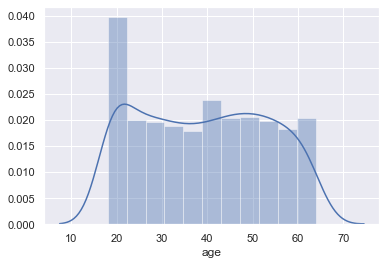

In [260]:
#Central Tendancy 
print('Mean :',insurance['age'].mean())
print('Median :',insurance['age'].median())
print('Mode :',insurance['age'].mode())


#Spread
min=insurance['age'].min()
max=insurance['age'].max()
range=max-min
print('Range:',range)
q1=insurance['age'].quantile(0.25)
q3=insurance['age'].quantile(0.75)
print('IQR :',q3-q1)

#Shape

sns.distplot(insurance['age'],kde=True)
stats.kurtosis(insurance['age'])

For Age:
The 3 Measure of Central Tendancy are

Mean  = 39.20
Median= 39.0
Mode  = 18

The shape of the  distribution is skewed towards the left and hence
Mode<Median<Mean
It has a negative kurtosis,not a proper normal distribution and is unimodal

It has a range of 46 and an Interquartile range of 24. 





Mean : 30.663396860986538
Median : 30.4
Mode : 0    32.3
dtype: float64
Range: 37.17
IQR : 8.3975


-0.05502310583700032

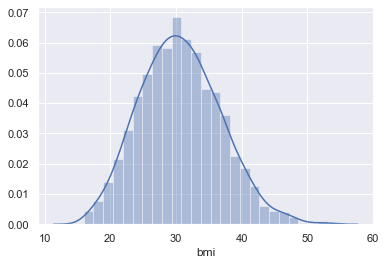

In [261]:
#Central Tendancy 
print('Mean :',insurance['bmi'].mean())
print('Median :',insurance['bmi'].median())
print('Mode :',insurance['bmi'].mode())


#Spread
min=insurance['bmi'].min()
max=insurance['bmi'].max()
range=max-min
print('Range:',range)
q1=insurance['bmi'].quantile(0.25)
q3=insurance['bmi'].quantile(0.75)
print('IQR :',q3-q1)

#Shape

sns.distplot(insurance['bmi'],kde=True)
stats.kurtosis(insurance['bmi'])

For Age:
The 3 Measure of Central Tendancy are

Mean  = 30.66
Median= 30.4
Mode  = 32.3

The shape of the  distribution is bell shaped towards the left and hence
Mean,Median and Mode are approximately equal
It has a kurtosis almost equal to 0 and hence it is close to a normal distribution and it is unimodal.

It has a range of 37.17 and an Interquartile range of 8.39. 


Mean : 13270.422265141257
Median : 9382.033
Mode : 0    1639.5631
dtype: float64
Range: 62648.554110000005
IQR : 11899.625365


1.595821363956751

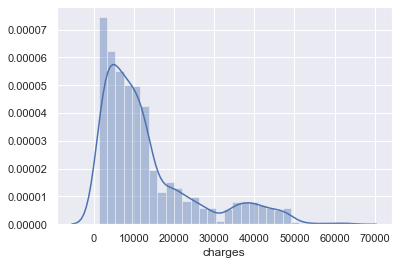

In [262]:
#Central Tendancy 
print('Mean :',insurance['charges'].mean())
print('Median :',insurance['charges'].median())
print('Mode :',insurance['charges'].mode())


#Spread
min=insurance['charges'].min()
max=insurance['charges'].max()
range=max-min
print('Range:',range)
q1=insurance['charges'].quantile(0.25)
q3=insurance['charges'].quantile(0.75)
print('IQR :',q3-q1)

#Shape

sns.distplot(insurance['charges'],kde=True)
stats.kurtosis(insurance['charges'])

For Age: The 3 Measure of Central Tendancy are

Mean = 13270.42
Median= 9382.033
Mode = 1639.56

The shape of the distribution is skewed towards the left and hence 
Mode<Median<Mean

It has a positive kurtosis and hence the shape is closer to that of a normal distribution,but with a skew and it is unimodal.

It has a range of  62648.55 and an Interquartile range of 11899.62

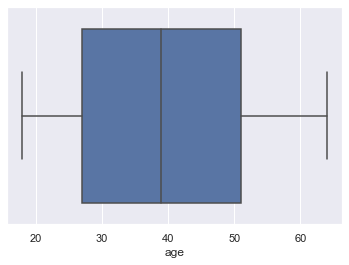

In [263]:
sns.boxplot(insurance['age'],fliersize=5)

No Outliers are present for 1.5 Times Inter Quartile Range for Age

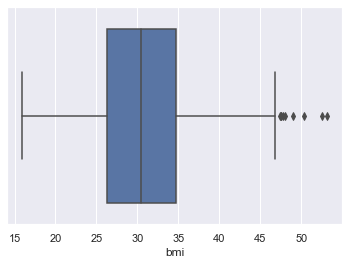

In [264]:
sns.boxplot(insurance['bmi'],fliersize=5)

Some outliers present after 1.5 times Inter Quartile Range for BMI

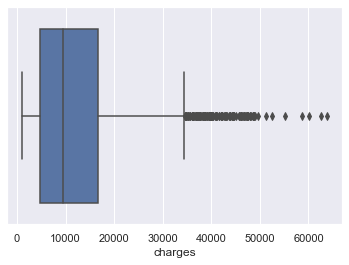

In [265]:
sns.boxplot(insurance['charges'],fliersize=5)

More outliers present outside the range of 1.5 times Interquartile Range for Charges

In [266]:
#Converting numerical variable children to categorical variable

insurance['children']=insurance['children'].astype(object,copy=False)

In [267]:
insurance.describe(include='object')

,sex,children,smoker,region
count,1338,1338,1338,1338
unique,2,6,2,4
top,male,0,no,southeast
freq,676,574,1064,364


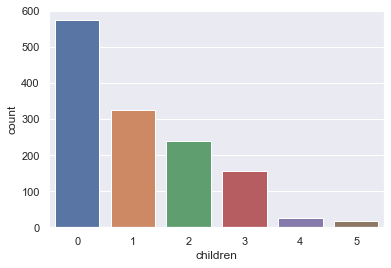

In [268]:
sns.countplot(x='children',data=insurance)

The categorical variable 'Children', has 6 unique values 
0,1,2,3,4,5
Out of which 0 has the maximum frequency of 574 times. 



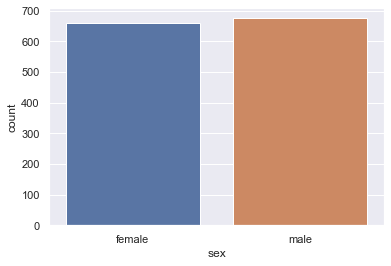

In [269]:
sns.countplot(x='sex',data=insurance)

The categorical variable 'Sex', has 6 unique values Male and Female,
Out of which Female has the maximum frequency of 676 times.

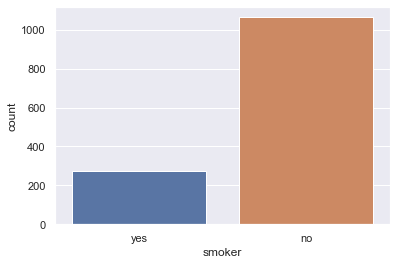

In [270]:
sns.countplot(x='smoker',data=insurance)

The categorical variable Smoker, has 2 categories, Yes and No, and out of total of 1338 samples, 1064 are Non-Smokers

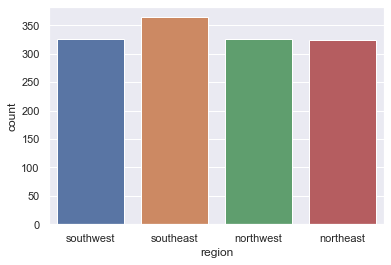

In [271]:
sns.countplot(x='region',data=insurance)

The categorical variable Children, has 4 unique values, Southwest,SouthEast,Northwest and Northeast. 
More people are living in the Southeast with a number of 364


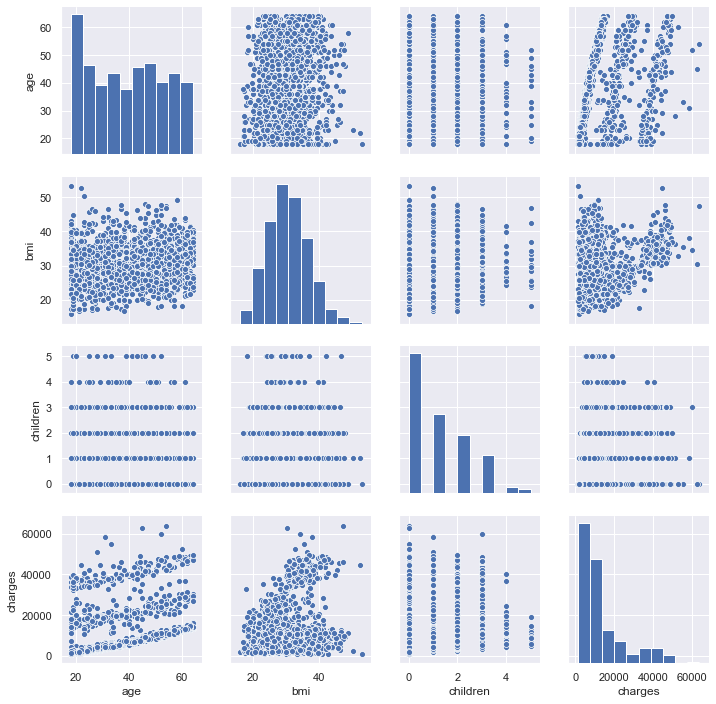

In [272]:
#Pair plot

sns.pairplot(insurance)

In [273]:
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [302]:
# Ho= There is no difference between charges of smokers and non-smokers
# Ha= There is difference between the charges of smokers and non-smokers

smokers=insurance['charges'][insurance['smoker']=='yes']
nonsmokers=insurance['charges'][insurance['smoker']=='no']
print('Smoker Mean Charge  :',smokers.mean())
print('Non Smoker Mean Charge : ',nonsmokers.mean())

t_stat,p_val=stats.ttest_ind(smokers,nonsmokers)

print("T Value: ",t_stat)
print("P_Value:", p_val)

if p_val < 0.05:
    print(f"\nReject Null Hypothesis as the P Value : {p_val} is less than 0.05",)
else:
    print(f"\nFail to Reject Null Hypothesis as the P Value : {p_val} is more than 0.05",)

Smoker Mean Charge  : 32050.23183153285
Non Smoker Mean Charge :  8434.268297856199
T Value:  46.664921172723716
P_Value: 8.271435842177219e-283

Reject Null Hypothesis as the P Value : 8.271435842177219e-283 is less than 0.05


There is a considerable difference between the mean of the Insurance Charges incurred by Smokers and Non-Smokers. 
And on Doing Individal T-Test on both the groups there is a high difference between the variance of both the groups
and they have an extremly low P-Value and hence we Reject the Null Hypothesis 
which implies
There is difference between the charges of smokers and non-smokers




In [303]:
#Ha= Charges of males differ signifincantly from females
#Ho= Charges of males do not differ from females
bmifemale=insurance['bmi'][insurance['sex']=='male']
bmimale=insurance['bmi'][insurance['sex']=='female']
print('BMI of Females  :',bmifemale.mean())
print('BMI of Males : ',bmimale.mean())

t_stat,p_val=stats.ttest_ind(bmifemale,bmimale)

print("T Value: ",t_stat)
print("P_Value:", p_val)

if p_val < 0.05:
    print(f"\nReject Null Hypothesis as the P Value : {p_val} is less than 0.05",)
else:
    print(f"\nFail to Reject Null Hypothesis as the P Value : {p_val} is more than 0.05",)

BMI of Females  : 30.943128698224832
BMI of Males :  30.377749244713023
T Value:  1.696752635752224
P_Value: 0.08997637178984932

Fail to Reject Null Hypothesis as the P Value : 0.08997637178984932 is more than 0.05


There is negligible difference between the mean of the BMI of males and females. On doing Individual T-Test on both the groups , they have a Tvalue of 1 and a P Value of 0.089 and hence we fail to reject H0
implies
Charges of males do not differ from females

In [343]:
#Ha=There is difference in the proportion of male and female smokers
#Ho=THere is no difference in the proportion of male and female smokers


female=insurance['smoker'][insurance['sex']=='female'].value_counts()
male=insurance['smoker'][insurance['sex']=='male'].value_counts()
fem=female['no']+female['yes']
mal=male['no']+male['yes']
femsmokers=female['yes']
malsmokers=male['yes']

stat,p_val=proportions_ztest([femsmokers,malsmokers],[fem,mal])

if p_val < 0.05:
    print(f"\nReject Null Hypothesis as the P Value : {p_val} is less than 0.05",)
else:
    print(f"\nFail to Reject Null Hypothesis as the P Value : {p_val} is more than 0.05",)


Reject Null Hypothesis as the P Value : 0.005324114164320532 is less than 0.05


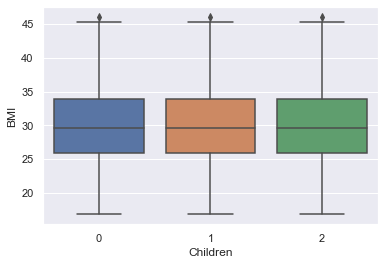

In [374]:
femaleBmi1=insurance['bmi'][(insurance['sex']=='female') & (insurance['children']==1)]
femaleBmi2=insurance['bmi'][(insurance['sex']=='female') & (insurance['children']==1)]
femaleBmi3=insurance['bmi'][(insurance['sex']=='female') & (insurance['children']==1)]

data1=pd.DataFrame({'Children':'0', 'BMI':femaleBmi1})
data2=pd.DataFrame({'Children':'1', 'BMI':femaleBmi2})
data3=pd.DataFrame({'Children':'2', 'BMI':femaleBmi3})

data=data1.append(data2)
dataframe=data.append(data3)


sns.boxplot(x='Children',y='BMI',data=dataframe)

Let Ho=There is no difference between the BMI of different categories of females with 0 1 or 2 children
    Ha= There is a significant difference between the BMI of different categories of females with 0 1 or 2 children
    

In [399]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

test=ols('BMI ~ Children',data=dataframe).fit()
output=sm.stats.anova_lm(test,typ=2)
p_val=output['PR(>F)']['Children']
if p_val < 0.05:
    print(f"\nReject Null Hypothesis as the P Value : {p_val} is less than 0.05",)
else:
    print(f"\nFail to Reject Null Hypothesis as the P Value : {p_val} is more than 0.05",)



Fail to Reject Null Hypothesis as the P Value : 1.0 is more than 0.05


Since we fail to reject Ho
Implies there is no difference between the BMI of different categories of females with 0 1 or 2 children